<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Insurance_Linear_Regression_Practice/Insurance_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
url = 'https://raw.githubusercontent.com/Iteba/Data-Science-Practice/refs/heads/main/Insurance_Linear_Regression_Practice/insurance.csv'
df = pd.read_csv(url)

# Exploration

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [111]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [112]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# Preprocessing

## Encoding

In [113]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [114]:
label_encoder = LabelEncoder()

In [115]:
hot_encoder = OneHotEncoder(sparse_output = False).set_output(transform = 'pandas')

In [116]:
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [117]:
df = pd.concat([df.drop(columns = ['sex', 'region']), hot_encoder.fit_transform(df[['sex', 'region']]).astype(int)], axis = 1)

## Scaling

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler().set_output(transform = 'pandas')

In [118]:
df[['children', 'age', 'bmi']] = scaler.fit_transform(df[['children', 'age', 'bmi']])

## Data Split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
model = LinearRegression()

In [124]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

## Predictions

In [125]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Predicted Values vs. Charges')

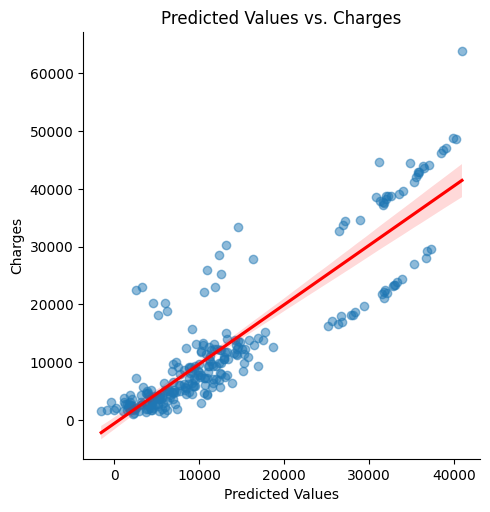

In [126]:
sns.lmplot(
    x = 'Predicted Values',
    y = 'Charges',
    data = pd.DataFrame(
        {
            'Predicted Values': predictions,
            'Charges': y_test
        }
    ),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Predicted Values vs. Charges')

## Residuals

In [102]:
residuals = y_test - predictions

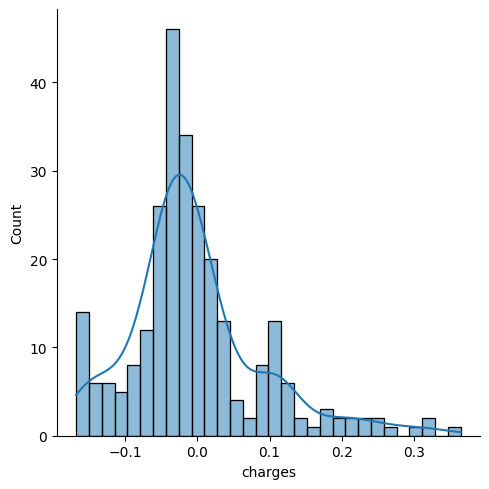

In [127]:
sns.displot(residuals, bins=30, kde=True)

## Error

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [137]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predictions))

Mean Absolute Error:  4181.19447375365
Mean Squared Error:  33596915.851361476
Root Mean Squared Error:  5796.284659276274


## Accuracy

In [139]:
from sklearn.metrics import r2_score

In [135]:
r2 = r2_score(y_test, predictions)

In [136]:
print('R2 Score: ', r2)

R2 Score:  0.7835929767120722
